In [5]:
import pandas as pd
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


df = pd.read_csv('diabetes.csv')


X = df.drop(columns=['Outcome']).values  
y = df['Outcome'].values  


X = (X - X.mean(axis=0)) / X.std(axis=0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=1000):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        
        y_ = np.where(y <= 0, -1, 1)

        
        for _ in range(self.n_epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)

                
                if y_[idx] * y_predicted <= 0:
                    self.weights += self.learning_rate * y_[idx] * x_i
                    self.bias += self.learning_rate * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = np.sign(linear_output)
        return np.where(y_predicted == -1, 0, 1)


perceptron = Perceptron(learning_rate=0.01, n_epochs=1000)


perceptron.fit(X_train, y_train)


y_pred = perceptron.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")


Accuracy: 75.32%
Precision: 72.97%
Recall: 49.09%
F1-Score: 58.70%


Accuracy: 75.32%
Precision: 72.97%
Recall: 49.09%
F1-Score: 58.70%


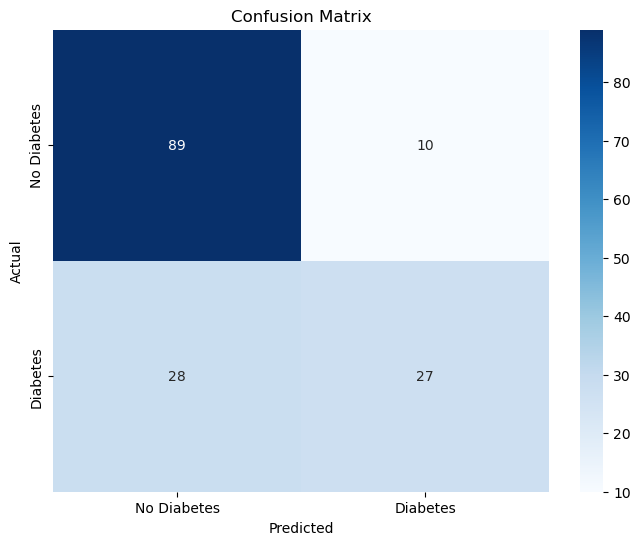

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('diabetes.csv')


X = df.drop(columns=['Outcome']).values  
y = df['Outcome'].values  


X = (X - X.mean(axis=0)) / X.std(axis=0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=1000):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        
        y_ = np.where(y <= 0, -1, 1)

        
        for _ in range(self.n_epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)

                
                if y_[idx] * y_predicted <= 0:
                    self.weights += self.learning_rate * y_[idx] * x_i
                    self.bias += self.learning_rate * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = np.sign(linear_output)
        return np.where(y_predicted == -1, 0, 1)


perceptron = Perceptron(learning_rate=0.01, n_epochs=1000)


perceptron.fit(X_train, y_train)


y_pred = perceptron.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
